In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import zipfile

In [0]:
local_zip = '/content/drive/My Drive/stacklite.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/My Drive/stacklite')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
questions=pd.read_csv('/content/drive/My Drive/stacklite/questions.csv')
question_tags=pd.read_csv('/content/drive/My Drive/stacklite/question_tags.csv')

In [6]:
questions.shape      #1.7mil rows and 7 attributes/data was completely loaded

(17203824, 7)

In [7]:
question_tags.shape   #complete data

(50576842, 2)

In [8]:
questions.tail(10)

,Id,CreationDate,ClosedDate,DeletionDate,Score,OwnerUserId,AnswerCount
17203814,42058726,2017-02-05T23:57:34Z,2017-02-06T00:43:46Z,NaN,-4,7520791.0,NaN
17203815,42058727,2017-02-05T23:57:39Z,NaN,NaN,1,6726592.0,1.0
17203816,42058728,2017-02-05T23:57:49Z,NaN,NaN,-1,1641444.0,NaN
17203817,42058729,2017-02-05T23:58:04Z,NaN,NaN,0,7520792.0,NaN
17203818,42058735,2017-02-05T23:58:36Z,NaN,NaN,2,7428353.0,1.0
17203819,42058740,2017-02-05T23:59:25Z,NaN,NaN,-2,7520803.0,NaN
17203820,42058743,2017-02-05T23:59:59Z,NaN,NaN,0,7056165.0,NaN
17203821,42066637,2017-02-04T20:16:32Z,NaN,NaN,-1,3357935.0,NaN
17203822,42067058,2017-02-05T17:04:16Z,NaN,NaN,0,356083.0,NaN
17203823,42069071,2017-02-05T22:35:16Z,NaN,NaN,0,7476349.0,NaN


In [9]:
question_tags.head(10)

,Id,Tag
0,1,data
1,4,c#
2,4,winforms
3,4,type-conversion
4,4,decimal
5,4,opacity
6,6,html
7,6,css
8,6,css3
9,6,internet-explorer-7


In [10]:
questions.columns

Index(['Id', 'CreationDate', 'ClosedDate', 'DeletionDate', 'Score',
       'OwnerUserId', 'AnswerCount'],
      dtype='object')

In [11]:
question_tags.columns

Index(['Id', 'Tag'], dtype='object')

In [0]:
#column names seem to be in place
#since dataset is too big,I am filtering out a subet,i.e,questions made in 2017

In [0]:
questions_2017=questions[(questions['CreationDate'] > '2017-01-01') & (questions['CreationDate'] < '2018-01-01')]

In [14]:
questions_2017.shape     #Roughly 300000 questions were made in 2017,this excludes deleted questions from the database
                         #also on closer look at the dataframe,I found that the data from 2017 only consists of questions from Jan and Feb

(300872, 7)

In [0]:
#Merging tags with questions
questions_merged=questions_2017.merge(question_tags)  #left join

In [0]:
questions_merged.head(10)     #question rows with multiple tags are duplicated,check Id repeating

,Id,CreationDate,ClosedDate,DeletionDate,Score,OwnerUserId,AnswerCount,Tag
0,41412454,2017-01-01T00:00:04Z,NaN,NaN,1,5824685.0,NaN,postgresql
1,41412454,2017-01-01T00:00:04Z,NaN,NaN,1,5824685.0,NaN,grails
2,41412454,2017-01-01T00:00:04Z,NaN,NaN,1,5824685.0,NaN,gsp
3,41412456,2017-01-01T00:00:39Z,NaN,NaN,-1,4927269.0,1.0,python
4,41412456,2017-01-01T00:00:39Z,NaN,NaN,-1,4927269.0,1.0,shell
5,41412456,2017-01-01T00:00:39Z,NaN,NaN,-1,4927269.0,1.0,expect
6,41412457,2017-01-01T00:00:57Z,2017-01-01T00:30:45Z,2017-01-25T03:00:27Z,-2,NaN,0.0,javascript
7,41412457,2017-01-01T00:00:57Z,2017-01-01T00:30:45Z,2017-01-25T03:00:27Z,-2,NaN,0.0,jquery
8,41412457,2017-01-01T00:00:57Z,2017-01-01T00:30:45Z,2017-01-25T03:00:27Z,-2,NaN,0.0,html
9,41412462,2017-01-01T00:02:06Z,NaN,NaN,2,1778157.0,NaN,angularjs


In [0]:
questions_merged.shape             

(894660, 8)

In [0]:
questions_merged['Tag'].describe()        #26417 unique tags

count         894442
unique         26417
top       javascript
freq           34422
Name: Tag, dtype: object

[('javascript', 34422), ('java', 26919), ('python', 22825), ('php', 22106), ('android', 21842), ('c#', 19210), ('html', 15092), ('jquery', 13511), ('css', 10100), ('ios', 9975)]


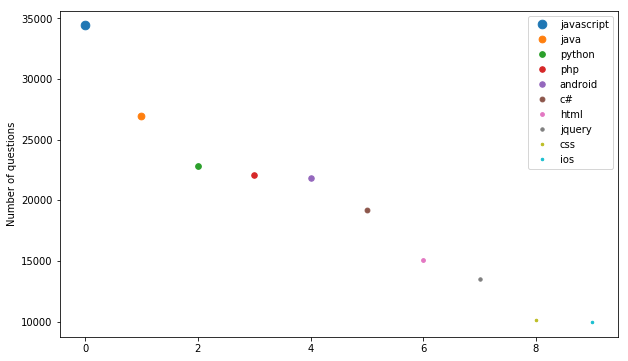

In [0]:
def plot_tags(tagCount):
    
    x,y = zip(*tagCount)
    colormap = plt.cm.gist_ncar #nipy_spectral 
    colors = [colormap(i) for i in np.linspace(0, 0.8,50)]
    area = [i/4000 for i in list(y)]   # 0 to 15 point radiuses
    plt.figure(figsize=(10,6))
    plt.ylabel("Number of questions")
    for i in range(len(y)):
      plt.plot(i,y[i],marker='o',linestyle='',ms=area[i],label=x[i])   
    plt.legend(numpoints=1)
    plt.show()
import collections

tagCount =  collections.Counter(list(questions_merged['Tag'])).most_common(10)
print(tagCount)
plot_tags(tagCount)

In [0]:
#So in 2017,Javascript was the most popular tag that appeared in questions,followed by java and python